## 零 引言

插值与拟合是数学建模中的一种基本的数据分析手段，被公认为建模中的常用算法之一。
在2011A“城市土壤污染分析”、2013A“车道被占对道路通行能力的影响”、2014A“嫦娥三号软着陆轨道设计与控制策略”中均用到插值或拟合。


   在数学建模过程中，通常要处理由试验、测量得到的大量数据或一些过于复杂而不便于计算的函数表达式，针对此情况，很自然的想法就是，构造一个简单的函
数作为要考察数据或复杂函数的近似。插值和拟合就可以解决这样的问题。给定一组数据，需要确定满足特定要求的曲线（或曲面），如果所求曲线通过所
给定的有限个数据点，这就是插值。有时由于给定的数据存在测量误差，往往具有一定的随机性。因而，通过所有数据点求曲线不现实也不必要。如果不要求曲线通过
所有数据点，而是要求它反映对象整体的变化态势，得到简单实用的近似函数，这就是曲线拟合。插值和拟合都是根据一组数据构造一个函数作为近似。

##  一 插值

实际应用中经常遇到如下问题，通过试验观测，得到某个未知函数y=f(x)的
一系列数据点（xi,yi)(i=0,1,...,n),一般要求æo《1<···<xn,但对于的
其他值对应的函数值是未知的。因此，我们希望能通过这些数据点，得到函数的解
析表达式，插值法是寻求函数近似表达式的有效方法之一。

为此，从性质优良、便于计算的函数类｛P(x)}中，选出一个使P(xi)=yi成
立的P(æ)作为f(x)的近似，这就是最基本的插值问题。通常co,c1,.·,cn称为
插值节点，｛P(x)}称为插值函数类，P(xi)=yi(i=0,1,..,n)称为插值条件，求出
的函数P(x)称为插值函数，f(x)称为被插值函数。


插值函数类的取法有很多，可以是代数多项式，也可以是三角函数多项式或有
理函数。由于代数多项式最简单，所以常用它来近似表达一些复杂的函数。
一维插值方法有很多，这里介绍一维 Lagrange插值、分段线性插值、分段二次
插值、牛顿插值和样条插值。二维插值仅介绍二维数据的双三次样条插值的思想。


### 1 插值方法

### 1.1 Lagrange 插值

In [3]:
###例1：编写函数Lag_intp(x,y,x0),实现Lagrange插值，其中x,y是两个具有相同长度的Numpy数组。

In [4]:
import numpy as np
def h(x,y,a):
    s=0.0
    for i in range(len(y)):
        t=y[i]
        for j in range(len(y)):
            if i !=j:
                t*=(a-x[j])/(x[i]-x[j])
        s +=t
    return s

x=[1,2]; y=[2,4]
print(h(x,y,1.5))

3.0


In [ ]:
#例1.2下面的函数用来

In [2]:
"""计算n阶差商 f[x0, x1, x2 ... xn]
输入参数：xi为所有插值节点的数组
输入参数：fi为所有插值节点函数值的数组
返回值:  返回xi的i阶差商(i为xi长度减1)"""
def diff_quo(xi=[], fi=[]):
    if len(xi)>2 and len(fi)>2:
        return (diff_quo(xi[:len(xi)-1],fi[:len(fi)-1])-diff_quo(xi[1:len(xi)],fi[1:len(fi)]))\
                /float(xi[0]-xi[-1])  #续行
    return (fi[0]- fi[1])/float(xi[0]-xi[1])

In [ ]:
#例1.3 下面的函数递归地计算

In [1]:
def diff_forward(f, k, h, x):
    if k<=0: return f(x)
    else: return diff_forward(f, k-1, h, x+h) - diff_forward(f, k-1, h, x)

In [ ]:
##1.4

In [7]:
plt.rc('font', family='SimHei', size=13)

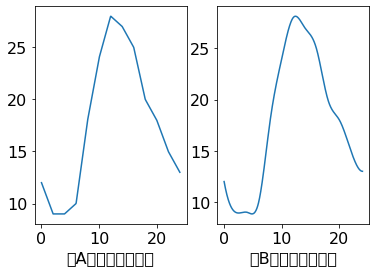

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 
x=np.arange(0,25,2)
y=np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])
xnew=np.linspace(0, 24, 500)  #插值点
f1=interp1d(x, y); y1=f1(xnew);
f2=interp1d(x, y,'cubic'); y2=f2(xnew)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
plt.subplot(121), plt.plot(xnew, y1); plt.xlabel("（A）分段线性插值")
plt.subplot(122); plt.plot(xnew, y2); plt.xlabel("（B）三次样条插值")
plt.savefig("figure7_4.png", dpi=500); 
plt.show()


绘制3D图时如果报错，参考https://blog.csdn.net/m0_46589710/article/details/105237111

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.axis([0, 10, 0, 10])
t = ("ACEACEACE\n "
     "ACEACE\n "
     "ACE")
plt.text(6, 1, t, ha='left', rotation=15, wrap=True)
plt.text(1, 5, t, ha='left', rotation=15, wrap=True)
plt.text(5, 5, t, ha='right', rotation=-15, wrap=True)
plt.text(5, 10, t, fontsize=18, style='oblique', ha='center',
         va='top', wrap=True)
plt.text(10, 4, t, family='serif', style='italic', ha='right', wrap=True)
plt.text(-1, 0, t, ha='left', rotation=-15, wrap=True)


Text(-1, 0, 'ACEACEACE\n ACEACE\n ACE')

In [9]:
##例1.5

区域的面积为： 4782737.815311186


<a list of 7 text.Text objects>

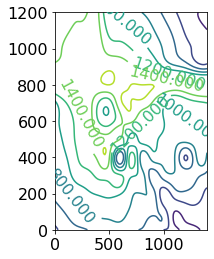

In [26]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d

plt.rcParams['text.usetex'] = False

z=np.loadtxt("Pdata7_5.txt")  #加载高程数据
x=np.arange(0,1500,100)
y=np.arange(1200,-100,-100)
f=interp2d(x, y, z, 'cubic')
xn=np.linspace(0,1400,141)
yn=np.linspace(0,1200,121)
zn=f(xn, yn)

m=len(xn); n=len(yn); s=0; 
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1=np.array([xn[i],yn[j],zn[j,i]])
        p2=np.array([xn[i+1],yn[j],zn[j,i+1]])
        p3=np.array([xn[i+1],yn[j+1],zn[j+1,i+1]])
        p4=np.array([xn[i],yn[j+1],zn[j+1,i]])
        p12=norm(p1-p2); p23=norm(p3-p2); p13=norm(p3-p1);
        p14=norm(p4-p1); p34=norm(p4-p3);
        L1=(p12+p23+p13)/2;s1=np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13));
        L2=(p13+p14+p34)/2; s2=np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34));
        s=s+s1+s2;   
print("区域的面积为：", s)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
plt.subplot(121)
contr=plt.contour(xn,yn,zn); plt.clabel(contr)

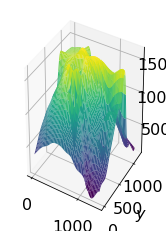

In [27]:
ax=plt.subplot(122,projection='3d'); 
X,Y=np.meshgrid(xn,yn)
ax.plot_surface(X, Y, zn,cmap='viridis')
ax.set_xlabel('$x$'); ax.set_ylabel('$y$'); ax.set_zlabel('$z$')
plt.savefig('figure7_5.png',dpi=500); plt.show()


In [3]:
##例1.6

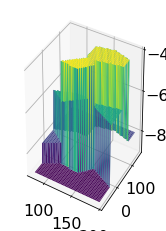

In [18]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
plt.rcParams['text.usetex'] = False
x=np.array([129,140,103.5,88,185.5,195,105,157.5,107.5,77,81,162,162,117.5])
y=np.array([7.5,141.5,23,147,22.5,137.5,85.5,-6.5,-81,3,56.5,-66.5,84,-33.5])
z=-np.array([4,8,6,8,6,8,8,9,9,8,8,9,4,9])
xy=np.vstack([x,y]).T
xn=np.linspace(x.min(), x.max(), 100)
yn=np.linspace(y.min(), y.max(), 100)
xng, yng = np.meshgrid(xn,yn)  #构造网格节点
zn=griddata(xy, z, (xng, yng), method='nearest')  #最近邻点插值

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xng, yng, zn,cmap='viridis')


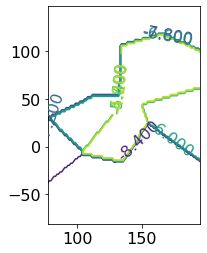

In [19]:

plt.subplot(122); c=plt.contour(xn,yn,zn,8); plt.clabel(c)
plt.show()


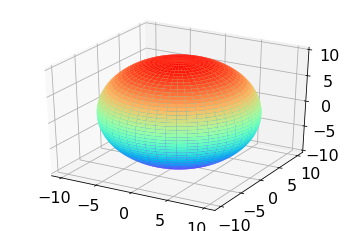

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
#ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x, y, z,cmap='rainbow')

plt.show()

In [ ]:
##例1.7

拟合二次多项式的从高次幂到低次幂系数分别为: [-9.81083916 20.12929371 -0.03167133]
预测值分别为： [4.38747465 5.81175367]


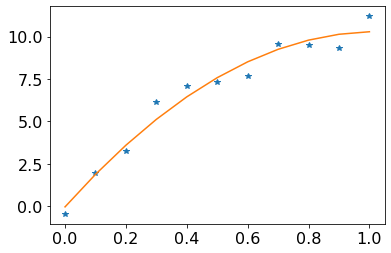

In [2]:
from numpy import polyfit, polyval, array, arange
from matplotlib.pyplot import plot,show,rc
x0=arange(0, 1.1, 0.1)
y0=array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
p=polyfit(x0, y0, 2) #拟合二次多项式
print("拟合二次多项式的从高次幂到低次幂系数分别为:",p)
yhat=polyval(p,[0.25, 0.35]); print("预测值分别为：", yhat)
rc('font',size=16)
plot(x0, y0, '*', x0, polyval(p, x0), '-'); 
show()

In [ ]:
##例1.8

In [3]:
import numpy as np
from scipy.optimize import curve_fit
y=lambda x, a, b, c: a*x**2+b*x+c
x0=np.arange(0, 1.1, 0.1)
y0=np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
popt, pcov=curve_fit(y, x0, y0)
print("拟合的参数值为：", popt)
print("预测值分别为：", y(np.array([0.25, 0.35]), *popt))

拟合的参数值为： [-9.81083901 20.12929291 -0.03167108]
预测值分别为： [4.38747471 5.81175366]


In [4]:
##例1.9

In [5]:
import numpy as np
from scipy.optimize import curve_fit
x0=np.array([6, 2, 6, 7, 4, 2, 5, 9])
y0=np.array([4, 9, 5, 3, 8, 5, 8, 2])
z0=np.array([5, 2, 1, 9, 7, 4, 3, 3])
xy0=np.vstack((x0, y0))
def Pfun(t, a, b, c):
    return a*np.exp(b*t[0])+c*t[1]**2
popt, pcov=curve_fit(Pfun, xy0, z0)
print("a，b，c的拟合值为：", popt)

a，b，c的拟合值为： [ 5.08907437e+00 -2.58251503e-03 -2.14509797e-02]


In [ ]:
##例1.10

三个参数的拟合值分别为： [1.02424361 1.98182992 3.00262035]


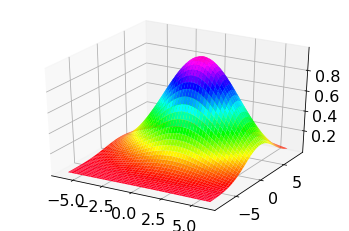

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
m=200; n=300
x=np.linspace(-6, 6, m); y=np.linspace(-8, 8, n);
x2, y2 = np.meshgrid(x, y)
x3=np.reshape(x2,(1,-1)); y3=np.reshape(y2, (1,-1))
xy=np.vstack((x3,y3))
def Pfun(t, m1, m2, s):
    return np.exp(-((t[0]-m1)**2+(t[1]-m2)**2)/(2*s**2))
z=Pfun(xy, 1, 2, 3); zr=z+0.2*np.random.normal(size=z.shape) #噪声数据
popt, pcov=curve_fit(Pfun, xy, zr)   #拟合参数
print("三个参数的拟合值分别为：",popt)
zn=Pfun(xy, *popt)  #计算拟合函数的值
zn2=np.reshape(zn, x2.shape)
plt.rc('font',size=16)
ax=plt.axes(projection='3d') #创建一个三维坐标轴对象
ax.plot_surface(x2, y2, zn2,cmap='gist_rainbow')
plt.savefig("figure7_10.png", dpi=500);
plt.show()
